In [11]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(19)
image = np.random.rand(8, 8)

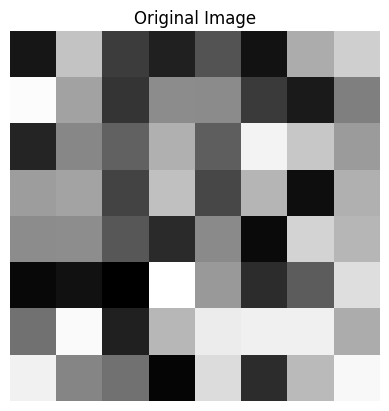

In [12]:
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## Discrete Costine Transform (DCT) matrix
$$ X_k = \sqrt{\frac{2}{n}} \cdot \cos\left( \frac{2\pi \cdot (2k+1)}{n} \right) $$


In [23]:
def dct_matrix(n:np.ndarray):
    dct_matrix = np.zeros((n, n))
    # Compute DCT matrix using cosine basis functions
    for k in range(n):
        for i in range(n):
            dct_matrix[k, i] = np.sqrt(2/n) * np.cos(np.pi * (2*i + 1) * k / (2*n))
    # normalize the first row (scaling factor) as per DCT definition
    dct_matrix[0] /= np.sqrt(2)
    return dct_matrix


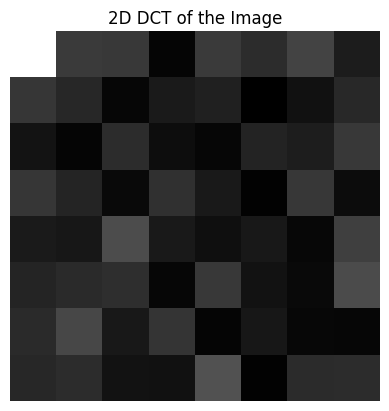

In [20]:
n = image.shape[0]
dct_transform = dct_matrix(n)
# get 2D DCT 
dct_forward = np.dot(dct_transform, np.dot(image, dct_transform.T))
plt.imshow(np.log(np.abs(dct_forward) + 1), cmap='gray')  # Log scale for better visualization
plt.title('2D DCT of the Image')
plt.axis('off')
plt.show()


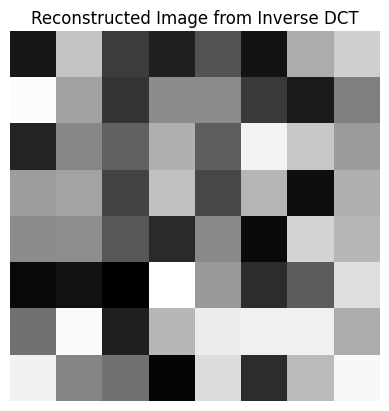

In [17]:
# inverse DCT
dct_inverse = np.dot(np.linalg.inv(dct_transform), np.dot(dct_forward, np.linalg.inv(dct_transform.T)))
# Inverse DCT(reconstructed img)
plt.imshow(dct_inverse, cmap='gray')
plt.title('Reconstructed Image from Inverse DCT')
plt.axis('off')
plt.show()